In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor

In [3]:
#loading the data from csv file to a Pandas DataFrame
exercise_data = pd.read_csv('exercise.csv')

# print the first 5 rows of the dataframe
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
calories_data=pd.read_csv('calories.csv')
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
#Combining the two Dataframes
df = pd.concat([exercise_data, calories_data['Calories']], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
#getting the number of rows and columns
df.shape

(15000, 9)

In [7]:
# getting informations about the data and check the missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
# Checking for null values in the entire DataFrame
null_values = df.isnull().sum()

# Displaying the count of null values for each column
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [9]:
# get some statistical measures about the data
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
#data Visualization

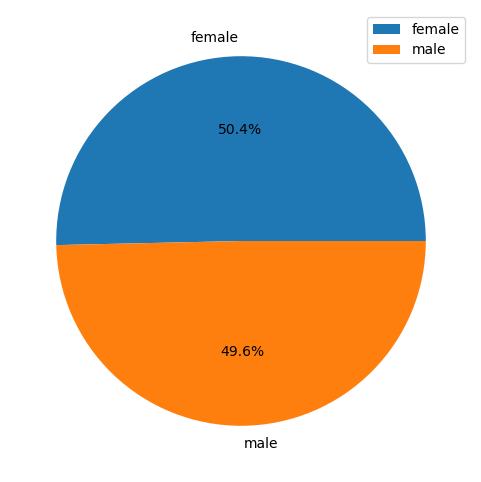

In [11]:
# Plotting a pie chart to visualize gender distribution
count_test = df['Gender'].value_counts()
labels = df['Gender'].value_counts().index
plt.figure(figsize= (6,6))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

C:\Users\amrab\AppData\Local\Temp\ipykernel_21432\1343217869.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\amrab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amrab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

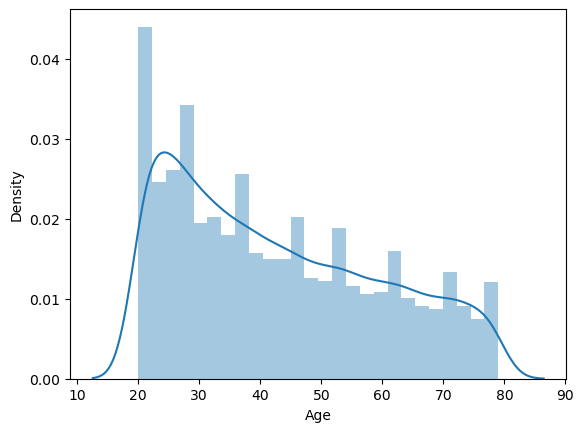

In [12]:
# Plotting a distribution of age using seaborn
sns.distplot(df['Age'])

C:\Users\amrab\AppData\Local\Temp\ipykernel_21432\3150987392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\amrab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amrab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

<Axes: xlabel='Height', ylabel='Density'>

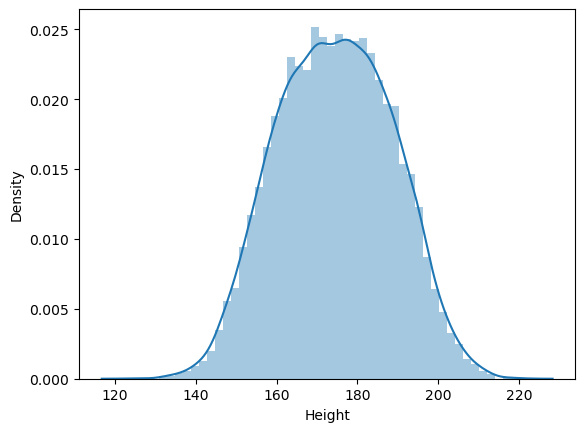

In [13]:
# Plotting a distribution of height using seaborn
sns.distplot(df['Height'])

C:\Users\amrab\AppData\Local\Temp\ipykernel_21432\3346488138.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])
C:\Users\amrab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amrab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

<Axes: xlabel='Weight', ylabel='Density'>

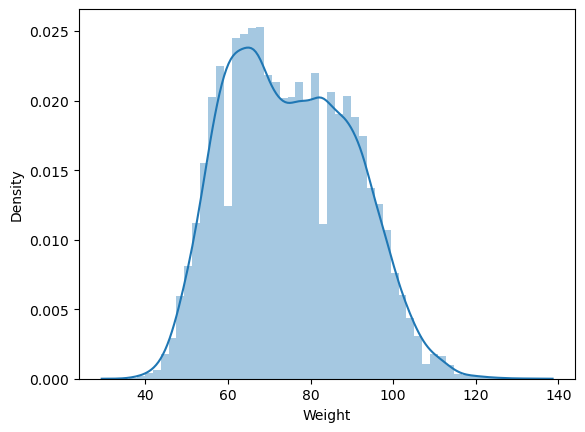

In [14]:
# Plotting a distribution of weight using seaborn
sns.distplot(df['Weight'])

In [15]:
#Converting the text data to numerical values
gender = {
    'male':1,
    'female':0
}
df['Gender']=df['Gender'].map(gender)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


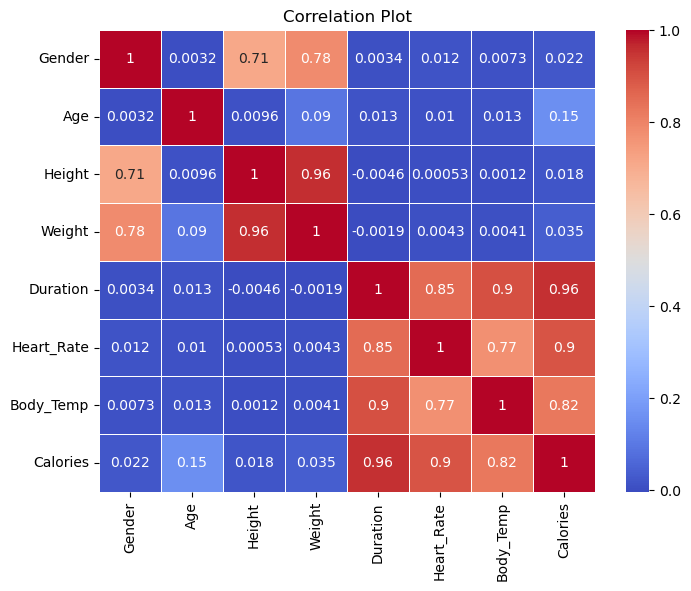

In [16]:
# Create a correlation plot using seaborn
correlation = df.drop(columns=['User_ID'], axis=1)
correlation.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot')
plt.show()

In [17]:
# Separating features and target variable from the DataFrame
x = df.drop(columns=['User_ID','Calories'], axis=1)
y = df['Calories']

In [18]:
x.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [19]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [20]:
y[0]

231.0

In [21]:
# Splitting the dataset into training and testing sets using a test size of 20% and a random seed of 0
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [23]:
# Creating a Linear Regression model
model = LinearRegression()

In [31]:
# Setting up K-fold cross-validation with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(model, x_train, y_train, cv=kfold)

print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-validation scores: [0.96718642 0.9656019  0.96779367 0.96628163 0.96641819]
Mean CV Score: 0.9666563627372389


In [32]:
# Fitting the Linear Regression model to the training data
model.fit(x_train, y_train)

# Making predictions on the test set
predictions = model.predict(x_test)
predictions

array([ 37.87701502,   4.06170735, 110.99156716, ...,  28.10508645,
       150.91974893, 146.45426893])

In [33]:
# calculating r-squared score for regression model
r2 = r2_score(predictions, y_test)
print(f'R-squared Score: {r2}')

R-squared Score: 0.9683635333933688


In [34]:
# Calculating and printing Mean Absolute Error (MAE) for model evaluation
mae = mean_absolute_error(predictions, y_test)
print(f'Mean Absolute Error: {mae}')

# Calculating and printing Mean Squared Error (MSE) for model evaluation
mse = mean_squared_error(predictions, y_test)
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 8.090679636313151
Mean Squared Error: 118.79074609385702


In [35]:
# Retrieving and printing the coefficients (weights) and intercept (b) of the Ridge Regression model
weights = model.coef_
print("Coefficients (Weights):", weights)
intercept = model.intercept_
print("Intercept (b):", intercept)

Coefficients (Weights): [ -1.49788173   0.49948721  -0.19829576   0.32270435   6.63247108
   2.00408805 -17.03395288]
Intercept (b): 466.677461033049


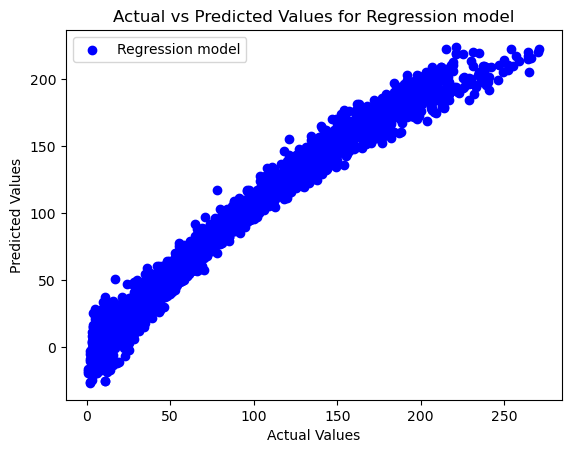

In [36]:
# Scatter plot for the actual vs predicted values for Regression model
plt.scatter(y_test, predictions, color='blue', label='Regression model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Regression model')
plt.legend()
plt.show()

In [37]:
#example
amr_farida = np.array([
    [1, 20, 185,90, 60, 90, 37], 
    [0, 20, 165,70, 30, 90, 37]     
])

predictions = model.predict(amr_farida)

print('amr : ',predictions[0])
print('farida : ',predictions[1])

amr :  415.58793170346576
farida :  215.6235093096907


C:\Users\amrab\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# Creating a K-Nearest Neighbors (KNN) Regression model with 5 neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

In [43]:
# Setting up K-fold cross-validation with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores_knn = cross_val_score(knn_model, x_train, y_train, cv=kfold)

print("KNN Cross-validation scores:", cv_scores_knn)
print("KNN Mean CV Score:", np.mean(cv_scores_knn))

KNN Cross-validation scores: [0.98652628 0.98503894 0.98675647 0.98475885 0.98491032]
KNN Mean CV Score: 0.9855981714151658


In [40]:
# Fitting the K-Nearest Neighbors (KNN) Regression model to the training data
knn_model.fit(x_train, y_train)

# Making predictions on the test set using the trained KNN model
knn_predictions = knn_model.predict(x_test)
knn_predictions

array([ 45.2,  12.8,  91.4, ...,  28.2, 148.6, 145. ])

In [41]:
# Calculating R2 score for knn model
knn_r2 = r2_score(y_test, knn_predictions)
print("R2 Score for knn model :", knn_r2)

R2 Score for knn model : 0.9877563495985314


In [42]:
# Calculating and printing Mean Absolute Error (MAE) for K-Nearest Neighbors (KNN) predictions
mae_knn = mean_absolute_error(knn_predictions, y_test)
print(f'KNN Mean Absolute Error: {mae_knn}')

# Calculating and printing Mean Squared Error (MSE) for K-Nearest Neighbors (KNN) predictions
mse_Knn = mean_squared_error(knn_predictions, y_test)
print(f'KNN Mean Squared Error: {mse_Knn}')

KNN Mean Absolute Error: 4.995533333333333
KNN Mean Squared Error: 47.24380000000001


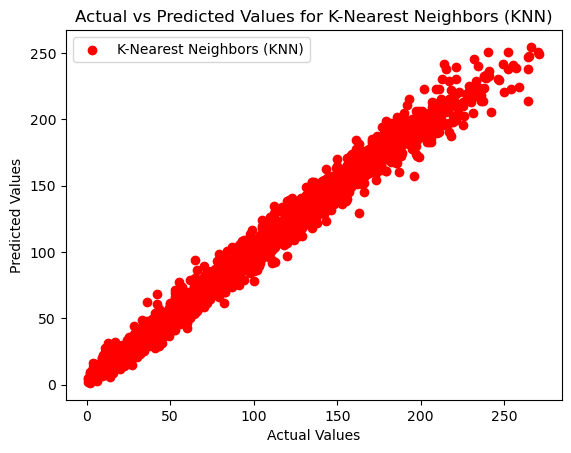

In [36]:
# Scatter plot for the actual vs predicted values for K-Nearest Neighbors (KNN)
plt.scatter(y_test, knn_predictions, color='red', label='K-Nearest Neighbors (KNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for K-Nearest Neighbors (KNN)')
plt.legend()
plt.show()
